In [1]:
from pandas import read_csv, DataFrame
from numpy import ndarray, array
from matplotlib.pyplot import figure, show, savefig
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from dslab_functions import read_train_test_from_files, get_variable_types, run_NB, run_KNN, CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_multibar_chart, plot_bar_chart, plot_evaluation_results, plot_multiline_chart

train_filename = "data/class_credit_score/data_preparation/balancing/smote.csv"
test_filename = "data/class_credit_score/data_preparation/balancing/balancing_test.csv"
file_tag = "class_credit_score"
target = "Credit_Score"

trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=87800 Test#=30605
Labels=[0, 1]


In [2]:
'''
target = 'Credit_Score'
labels = data[target].unique()
X, y = data.loc[:, data.columns != 'Credit_Score'], data['Credit_Score']
trnX, tstX, trnY, tstY = train_test_split(X, y, test_size = 0.33, random_state=1)

print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")
'''

Train#=87689 Test#=43191
Labels=[0 1]


### NAIVE BAYES

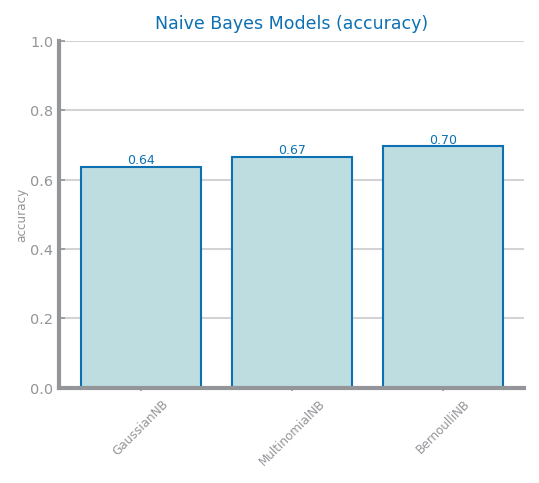

In [2]:
def naive_Bayes_study(
    trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, metric: str = "accuracy"
) -> tuple:
    estimators: dict = {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "BernoulliNB": BernoulliNB(),
    }

    xvalues: list = []
    yvalues: list = []
    best_model = None
    best_params: dict = {"name": "", "metric": metric, "params": ()}
    best_performance = 0
    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(trnX, trnY)
        prdY: array = estimators[clf].predict(tstX)
        eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
        if eval - best_performance > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["name"] = clf
            best_params[metric] = eval
            best_model = estimators[clf]
        yvalues.append(eval)
        # print(f'NB {clf}')
    plot_bar_chart(
        xvalues,
        yvalues,
        title=f"Naive Bayes Models ({metric})",
        ylabel=metric,
        percentage=True,
    )

    return best_model, best_params


figure()
eval_metric = "accuracy"
best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
savefig(f"images/{file_tag}/data_classification/naive_bayes/{eval_metric}_study.png")
show()

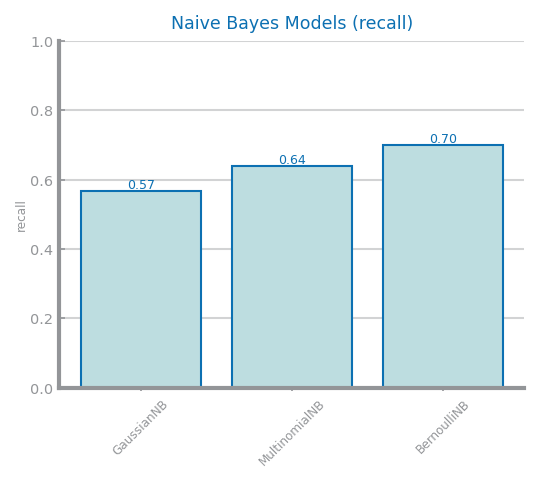

In [3]:
figure()
eval_metric = "recall"
best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
savefig(f"images/{file_tag}/data_classification/naive_bayes/{eval_metric}_study.png")
show()

<Figure size 600x450 with 0 Axes>

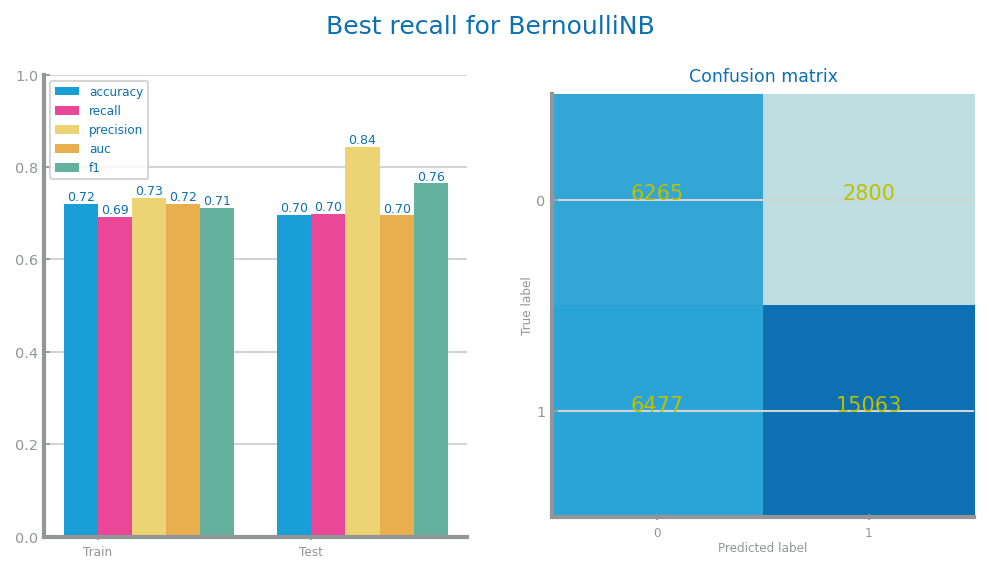

In [4]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
#list(trnY[target].unique())
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/{file_tag}/data_classification/naive_bayes/{params["name"]}_best_{params["metric"]}_eval.png')
show()

### KNN

In [5]:
from typing import Literal
from sklearn.neighbors import KNeighborsClassifier

KNN best with k=1 and manhattan


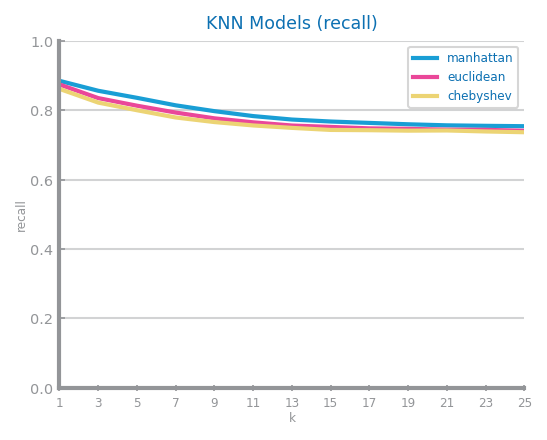

In [6]:
def knn_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, k_max: int=19, lag: int=2, metric='accuracy'
        ) -> tuple[KNeighborsClassifier | None, dict]:
    dist: list[Literal['manhattan', 'euclidean', 'chebyshev']] = ['manhattan', 'euclidean', 'chebyshev']

    kvalues: list[int] = [i for i in range(1, k_max+1, lag)]
    best_model: KNeighborsClassifier | None = None
    best_params: dict = {'name': 'KNN', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict[str, list] = {}
    for d in dist:
        y_tst_values: list = []
        for k in kvalues:
            clf = KNeighborsClassifier(n_neighbors=k, metric=d)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance: float = eval
                best_params['params'] = (k, d)
                best_model = clf
            # print(f'KNN {d} k={k}')
        values[d] = y_tst_values
    print(f'KNN best with k={best_params["params"][0]} and {best_params["params"][1]}')
    plot_multiline_chart(kvalues, values, title=f'KNN Models ({metric})', xlabel='k', ylabel=metric, percentage=True)

    return best_model, best_params

figure()
best_model, params = knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
savefig(f'images/{file_tag}/data_classification/knn/{eval_metric}_study.png')
show()

<Figure size 600x450 with 0 Axes>

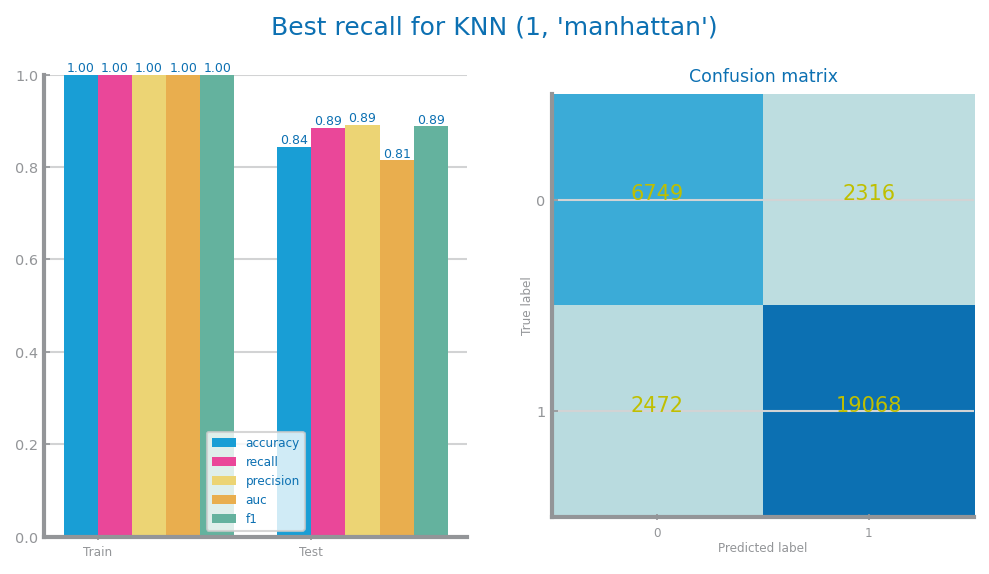

In [7]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/{file_tag}/data_classification/knn/{params["name"]}_best_{params["metric"]}_eval.png')
show()

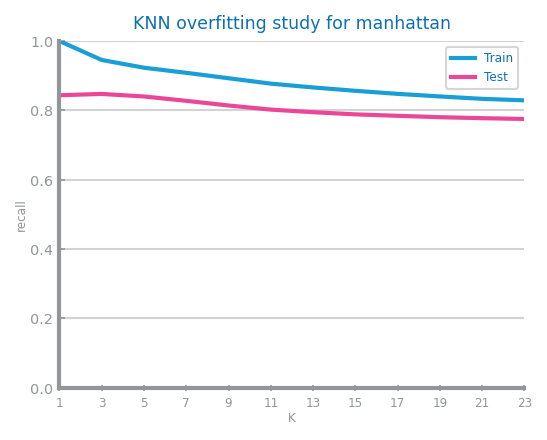

In [8]:
distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}/data_classification/knn/overfitting.png")
show()

### DECISION TREES

In [9]:
from typing import Literal
from sklearn.tree import DecisionTreeClassifier
eval_metric = "recall"

DT best with entropy and d=16


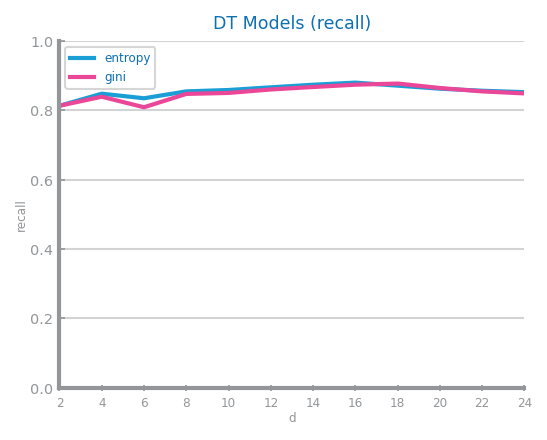

In [10]:
def trees_study(
        trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, d_max: int=10, lag:int=2, metric='accuracy'
        ) -> tuple:
    criteria: list[Literal['entropy', 'gini']] = ['entropy', 'gini']
    depths: list[int] = [i for i in range(2, d_max+1, lag)]

    best_model: DecisionTreeClassifier | None = None
    best_params: dict = {'name': 'DT', 'metric': metric, 'params': ()}
    best_performance: float = 0.0

    values: dict = {}
    for c in criteria:
        y_tst_values: list[float] = []
        for d in depths:
            clf = DecisionTreeClassifier(max_depth=d, criterion=c, min_impurity_decrease=0)
            clf.fit(trnX, trnY)
            prdY: array = clf.predict(tstX)
            eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
            y_tst_values.append(eval)
            if eval - best_performance > DELTA_IMPROVE:
                best_performance = eval
                best_params['params'] = (c, d)
                best_model = clf
            # print(f'DT {c} and d={d}')
        values[c] = y_tst_values
    print(f'DT best with {best_params["params"][0]} and d={best_params["params"][1]}')
    plot_multiline_chart(depths, values, title=f'DT Models ({metric})', xlabel='d', ylabel=metric, percentage=True)

    return best_model, best_params


figure()
best_model, params = trees_study(trnX, trnY, tstX, tstY, d_max=25, metric=eval_metric)
savefig(f'images/{file_tag}/data_classification/decision_trees/{eval_metric}_study.png')
show()

<Figure size 600x450 with 0 Axes>

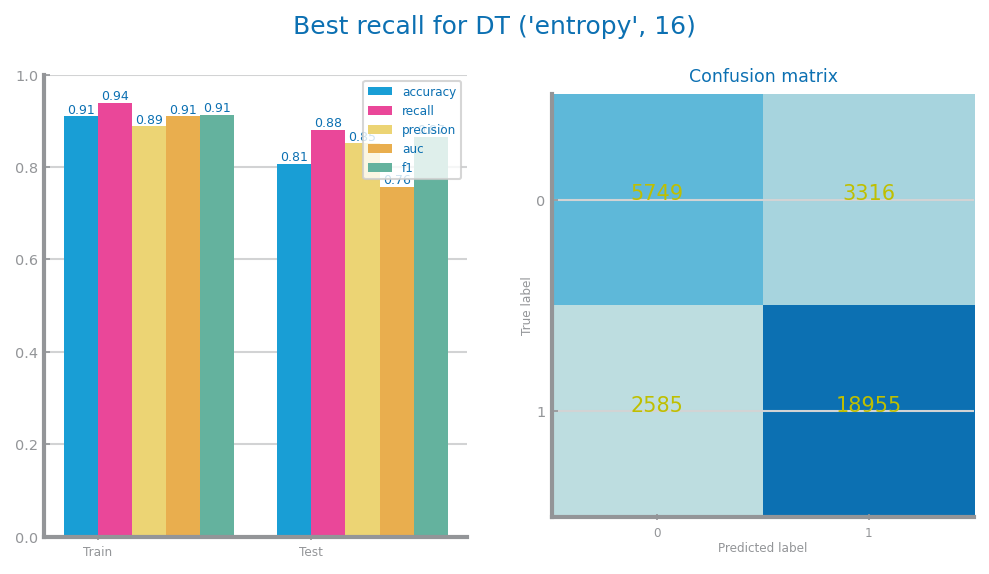

In [11]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'images/{file_tag}/data_classification/decision_trees/{params["name"]}_best_{params["metric"]}_eval.png')
show()

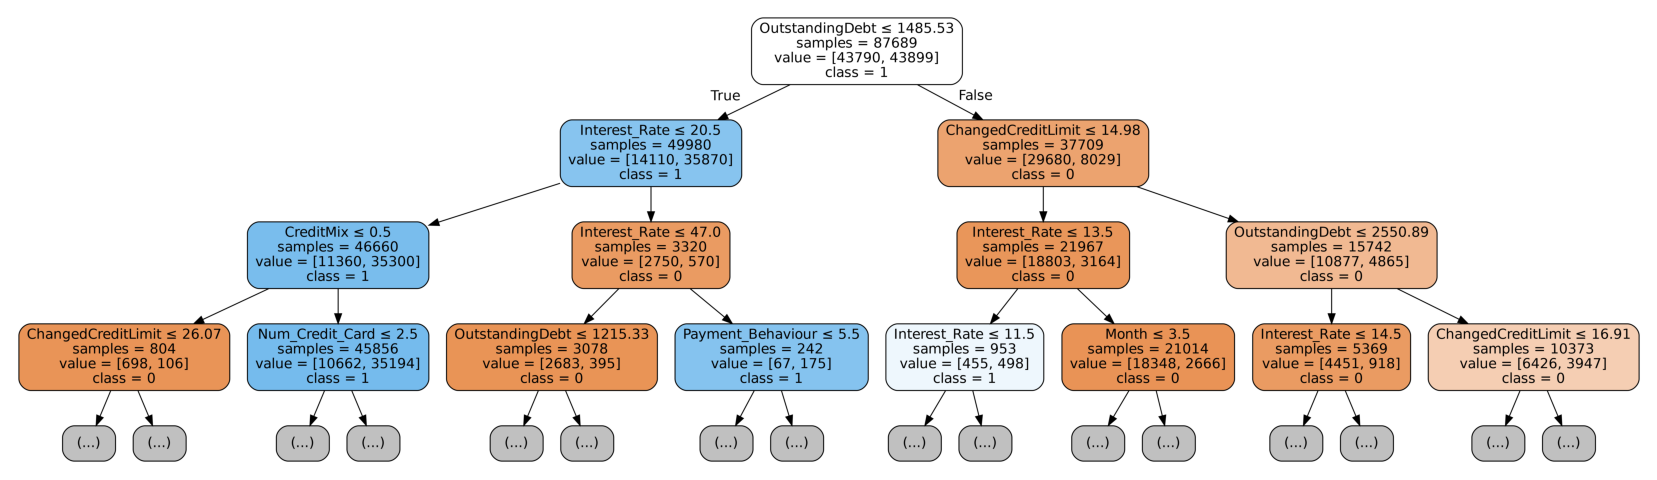

In [19]:
from sklearn.tree import export_graphviz
from matplotlib.pyplot import imread, imshow, axis
from subprocess import call

tree_filename: str = f"{file_tag}_dt_{eval_metric}_best_tree"
max_depth2show = 3
st_labels: list[str] = [str(value) for value in labels]

dot_data: str = export_graphviz(
    best_model,
    out_file=tree_filename + ".dot",
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    special_characters=True,
    precision=2,
)
'''
# Convert to png
call(
    ["dot", "-Tpng", tree_filename + ".dot", "-o", tree_filename + ".png", "-Gdpi=600"]
)
'''
figure(figsize=(14, 6))
imshow(imread(tree_filename + ".png"))
axis("off")
show()

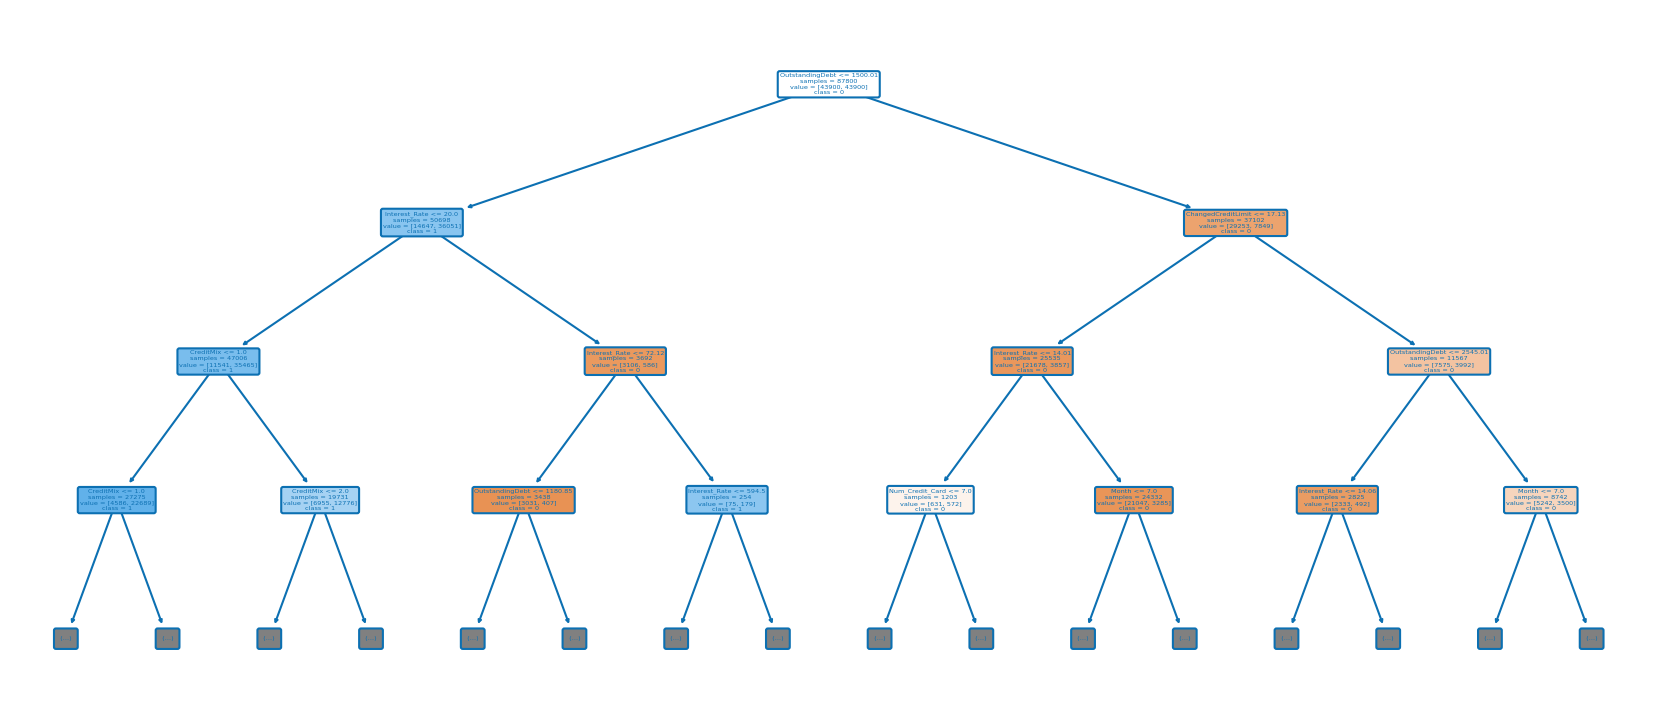

In [20]:
from sklearn.tree import plot_tree

figure(figsize=(14, 6))
plot_tree(
    best_model,
    max_depth=max_depth2show,
    feature_names=vars,
    class_names=st_labels,
    filled=True,
    rounded=True,
    impurity=False,
    precision=2,
)
savefig(f'images/{file_tag}/data_classification/decision_trees/{tree_filename}.png')

1. OutstandingDebt (0.29358598066682146)
2. Month (0.1254399203011354)
3. CreditMix (0.11465934651208619)
4. Interest_Rate (0.09327738305092914)
5. Delay_from_due_date (0.04466740343409675)
6. ChangedCreditLimit (0.0382958319464304)
7. Num_Credit_Card (0.028361574606952614)
8. Payment_Behaviour (0.02732044760894923)
9. Annual_Income (0.019318082719284407)
10. NumCreditInquiries (0.016438956927342)
11. Amountinvestedmonthly (0.01625396706331863)
12. Num_Bank_Accounts (0.016247703123592253)
13. Credit_History_Age (0.015786185586052097)
14. NumofDelayedPayment (0.014576789959925195)
15. TotalEMIpermonth (0.014198314895574988)
16. Monthly_Inhand_Salary (0.014172322477838645)
17. CreditUtilizationRatio (0.013768189288299806)
18. MonthlyBalance (0.013679537671012085)
19. Occupation (0.011428642967791622)
20. Age (0.011204924114256219)
21. Student Loan (0.008310383479837627)
22. Credit-Builder Loan (0.007418827841843495)
23. Auto Loan (0.006327901141067482)
24. Not Specified (0.00619474285167

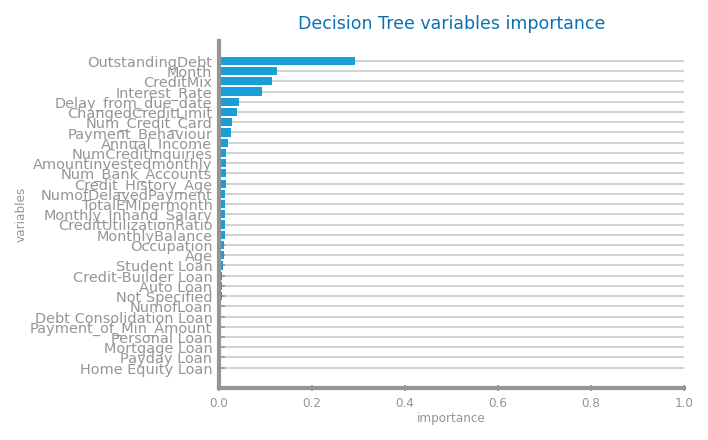

In [21]:
from numpy import argsort
from dslab_functions import plot_horizontal_bar_chart

importances = best_model.feature_importances_
indices: list[int] = argsort(importances)[::-1]
elems: list[str] = []
imp_values: list[float] = []
for f in range(len(vars)):
    elems += [vars[indices[f]]]
    imp_values += [importances[indices[f]]]
    print(f"{f+1}. {elems[f]} ({importances[indices[f]]})")

figure()
plot_horizontal_bar_chart(
    elems,
    imp_values,
    title="Decision Tree variables importance",
    xlabel="importance",
    ylabel="variables",
    percentage=True,
)
savefig(f"images/{file_tag}/data_classification/decision_trees/{eval_metric}_vars_ranking.png")

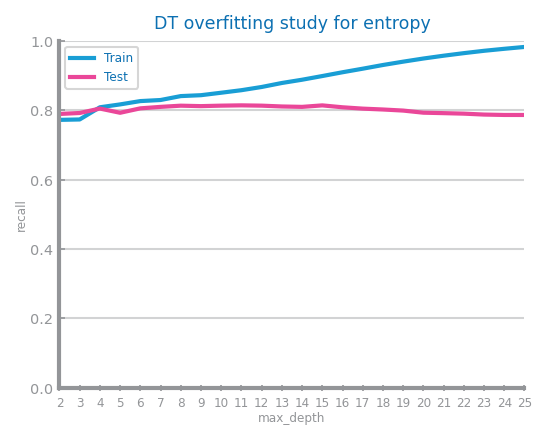

In [22]:
crit: Literal["entropy", "gini"] = params["params"][0]
d_max = 25
depths: list[int] = [i for i in range(2, d_max + 1, 1)]
y_tst_values: list[float] = []
y_trn_values: list[float] = []
acc_metric = "accuracy"
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, criterion=crit, min_impurity_decrease=0)
    clf.fit(trnX, trnY)
    prd_tst_Y: array = clf.predict(tstX)
    prd_trn_Y: array = clf.predict(trnX)
    y_tst_values.append(CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
plot_multiline_chart(
    depths,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"DT overfitting study for {crit}",
    xlabel="max_depth",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"images/{file_tag}/data_classification/decision_trees/{eval_metric}_overfitting.png")
